In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LassoCV, ElasticNetCV, RidgeCV
import time

In [127]:
data = pd.read_csv("../datasets/beer_consumption/Consumo_cerveja.csv", delimiter=',').dropna()
data = data.drop(data.columns[[0]], axis=1)
data = data.replace({',':'.'},regex=True).apply(pd.to_numeric,1)
data['Consumo de cerveja (litros)'] = data['Consumo de cerveja (litros)'] * 1000
features = list(data.columns[1:5])

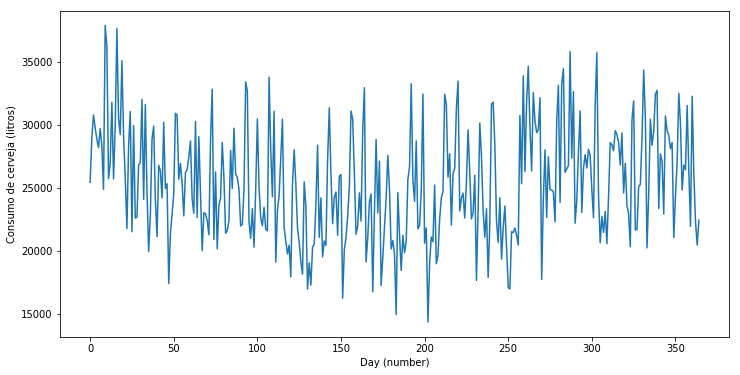

In [128]:
plt.figure(figsize=(12,6))
plt.plot(data['Consumo de cerveja (litros)'])
plt.xlabel('Day (number)')
plt.ylabel('Consumo de cerveja (litros)')
plt.show()

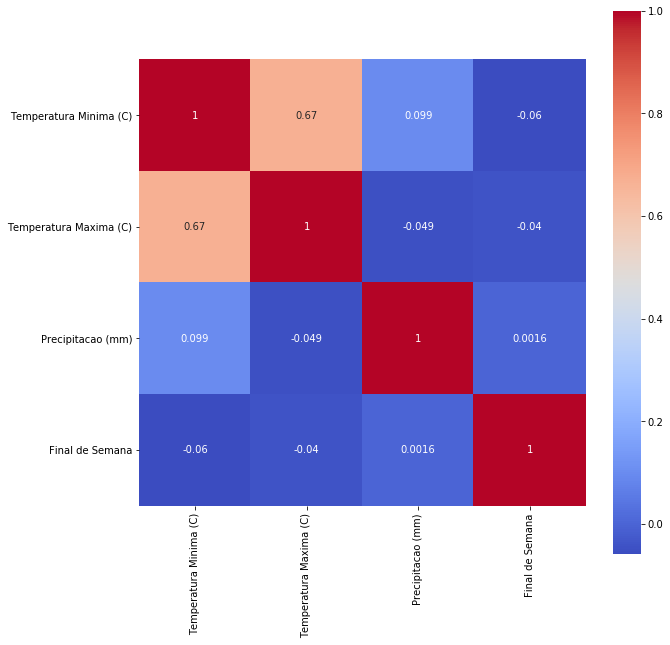

In [129]:
plt.figure(figsize=(10,10))
sns.heatmap(data[features].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

In [130]:
X_data = data.loc[:, features]
y_data = data.loc[:, 'Consumo de cerveja (litros)']
X = X_data.values
y = y_data.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [131]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(292, 4)
(292,)
(73, 4)
(73,)


In [152]:
score_all = []
prediction_all = []
alpha_all = []
cvs_all = []
time_all = []

def evaluate_classifier(model, name):
    start = time.time()

    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    score = model.score(X_test, y_test)
    scores = cross_val_score(model, X, y, cv=5)

    end = time.time()
    
    score_all.append(score)
    prediction_all.append(prediction)
    alpha_all.append(model.alpha_)
    cvs_all.append(np.mean(scores))
    time_all.append(end-start)

    print(name + " Classifier Accuracy: {0:.2%}".format(score))
    print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
    print("Best alpha value: {0:.2}".format(model.alpha_))
    print("Execution time: {0:.5} seconds \n".format(end-start))


In [153]:
evaluate_classifier(LassoCV(random_state=45, cv=5), "Lasso")
evaluate_classifier(ElasticNetCV(random_state=45, cv=5), "ElasticNet")

Lasso Classifier Accuracy: 68.83%
Cross validation score: 66.22% (+/- 17.06%)
Best alpha value: 3.9e+01
Execution time: 0.24184 seconds 

ElasticNet Classifier Accuracy: 31.14%
Cross validation score: 28.65% (+/- 20.28%)
Best alpha value: 2.6e+01
Execution time: 0.22857 seconds 



In [151]:
print(prediction_all)

[array([28932.09652744, 26139.91008825, 22818.71212235, 26760.5327992 ,
       25936.04495198, 25342.38469386, 31441.56830462, 24663.50660012,
       29360.31882312, 25043.29347061, 24717.71903783, 23469.51827286,
       24825.89334778, 27043.86463868, 28145.68887483, 24391.68324213,
       28349.5540111 , 34381.72388826, 22293.96069079, 24979.46669756,
       18381.63122434, 25273.29910134, 25016.1183373 , 20223.00743401,
       23883.99160822, 31970.27124259, 30489.59867171, 28994.45003833,
       23941.46923446, 20834.82779776, 25048.89500514, 24423.56239971,
       26085.02529006, 21667.60462254, 22676.4638659 , 23392.22733655,
       25560.05670844, 30775.36634198, 20527.30627577, 21437.59899181,
       22024.88979312, 30510.54888147, 23650.97727101, 23757.01251103,
       26994.67376051, 24337.6179674 , 25291.23425203, 19603.14261094,
       29549.6670768 , 28930.35113763, 19521.75598144, 22620.84243663,
       30884.85769401, 23420.97164027, 29413.23939324, 29498.75300714,
     

In [135]:
#df = pd.DataFrame({'accuracy_all':accuracy_all}, index=['Lasso', 'ElasticNet', 'Ridge'])
#print(df)